# Midterm Examination (2020-21) {July-December 2023}

## SET-A  
1. A six-sided dice rolled and produces random numbers from 1 to 6. Simulate the Gambling Game with six-sided dice rolled in odd trails as H and even trail as T. When the difference between H and T will be 20, game is over. It costs $1 in each trail. Use Monte Carlo Method and analyze profit-loss.

Note: Here, the profit amount when the difference turns 20, has not been defined. So we took a variable to for that named `profit_amount`.

In [3]:
# Six sided rolled dice 
# 1 - 6 values 
# H = odd trail
# T = even trail
# Difference = 20
# Each trail costs $1

import random
import pandas as pd
from tabulate import tabulate

# defining variables
profit_amount = 100
total_profit = 0
total_loss = 0



for game in range(10):
    random_number = []
    head = 0
    heads_count = []
    tail = 0
    tails_count = []
    h_t = []
    differences = []

    current_cost_i = 0
    profit_loss_i = 0

    print(f"Game No.: {game + 1}")

    i = 0
    while (1):
        rand = random.randrange(1, 6)
        random_number.append(rand)

        current_cost_i += 1

        if (rand % 2 != 0):
            head += 1
            heads_count.append(head)
            if (i == 0):
                tails_count.append(0)
            else:
                tails_count.append(tails_count[i-1])
            h_t.append('H')
        elif (rand % 2 == 0):
            tail += 1
            tails_count.append(tail)
            if (i == 0):
                heads_count.append(0)
            else:
                heads_count.append(heads_count[i-1])
            h_t.append('T')
        
        difference = abs(head - tail)
        differences.append(difference)
        i += 1
        if (difference >= 20):
            profit_loss_i = (profit_amount - current_cost_i)

            if (profit_loss_i >= 0):
                total_profit += profit_loss_i
            else:
                total_loss += abs(profit_loss_i)

            # print(f"{len(random_number), len(h_t), len(heads_count), len(tails_count), len(differences)}")

            df = pd.DataFrame({
                "Random Number" : random_number,
                "Head or Tail" : h_t,
                "Heads" : heads_count,
                "Tails" : tails_count,
                "Difference" : differences
            })

            table = tabulate(
                df,
                headers="keys",
                tablefmt="pipe"
            )

            print(table)
            print("\n")
            print(f"Cost for Trails  : {current_cost_i}")
            print(f"Profit from Game : {profit_amount}")
            print(f"Profit or Loss   : {profit_loss_i}\n\n")


            break
final_profit_loss = (total_profit - total_loss)
print("\n")
print(f"Total Profit  : {total_profit}")
print(f"Total Loss    : {total_loss}")
if (total_profit >= abs(total_loss)):
    print(f"Final Balance : {final_profit_loss}")
    print("Winning..")
else:
    print(f"Final Balance : {final_profit_loss}")
    print("Loosing..")


Game No.: 1
|     |   Random Number | Head or Tail   |   Heads |   Tails |   Difference |
|----:|----------------:|:---------------|--------:|--------:|-------------:|
|   0 |               3 | H              |       1 |       0 |            1 |
|   1 |               5 | H              |       2 |       0 |            2 |
|   2 |               2 | T              |       2 |       1 |            1 |
|   3 |               1 | H              |       3 |       1 |            2 |
|   4 |               1 | H              |       4 |       1 |            3 |
|   5 |               5 | H              |       5 |       1 |            4 |
|   6 |               3 | H              |       6 |       1 |            5 |
|   7 |               4 | T              |       6 |       2 |            4 |
|   8 |               1 | H              |       7 |       2 |            5 |
|   9 |               1 | H              |       8 |       2 |            6 |
|  10 |               5 | H              |       9 |

2. A flying object moves randomly. It moves L, R, F, and B in 25%, 35%, 30%, and 10% probability respectively. It also has 80% upward and 20% downward tendency. Identify the location of flying object after 50 epochs by Monte Carlo Method.

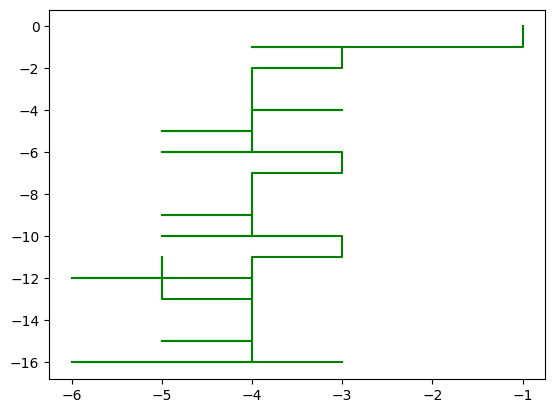

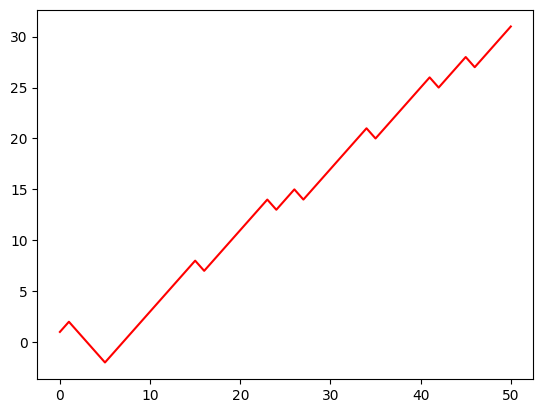

In [4]:
import random
import matplotlib.pyplot as plt

x = 0
y = 0
step = 0
direction = []
dotx = []
doty = []

for simulationFB in range(1):
  lrfb = [2.5, 3.5, 3, 1]
  lrfb = [int(i * 10) for i in lrfb]

  while (step <= 50):
    rn = random.randint(0, 100)

    if rn in range (lrfb[0]):
      direction.append('L')
      x -= 1
      dotx.append(x)
      doty.append(y)
    elif rn in range (lrfb[0], lrfb[0] + lrfb[1]):
      direction.append('R')
      x += 1
      dotx.append(x)
      doty.append(y)
    elif rn in range (lrfb[1], lrfb[1] + lrfb[2]):
      direction.append('F')
      y += 1
      dotx.append(x)
      doty.append(y)
    else:
      direction.append('B')
      y -= 1
      dotx.append(x)
      doty.append(y)
    step += 1
  plt.plot(dotx, doty, color="green")
plt.show()

m = 0
udStep = 0
udDirection = []
dotm = []

for simulationUD in range (1):
  ud = [8, 2]
  ud = [int (i*10) for i in ud]

  while (udStep <= 50):
    rm = random.randint(0, 100)

    if rm in range (ud[0]):
      udDirection.append('U')
      m += 1
      dotm.append(m)
    else:
      udDirection.append('R')
      m -= 1
      dotm.append(m)
    udStep += 1
  plt.plot(dotm, color="red")
plt.show()

## Set-B  
3. Write a program that performs a simple M/M/1 queue simulation. This program requires parameters for the `Mean Inter Arrival Time of Customers`, `Mean Service Time` as well as the `Maximum Number of Cuustomers`. The simulation is started with a single-server queue with a FIFO queuing decipline. For M/M/1 queue, the `Customer Inter-Arrival Time` and the `Service Time` are both exponentially distributed. This simulation shows the `Average Delay in Queue`, `Average Number in Queue`, `Server Utilization`, and `Time Simulation Ended`.